### Assignment 6

## Knock Airport Weather

This notebook will retrieve the data from https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv which I will use to analyse the data. 

import libraries

In [4]:
import os
import pandas as pd     
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


import the data from https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

In [5]:
data = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', delimiter=',', on_bad_lines='skip', skiprows = 23)

/tmp/ipykernel_7708/2394797928.py:1: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', delimiter=',', on_bad_lines='skip', skiprows = 23)


Convert into a Pandas DataFrame

In [6]:
df = pd.DataFrame(data)

Check the data

In [7]:
print(df.head())

                date  ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  rhum  \
0  10-apr-1996 14:00    0  0.0      0  11.5      0   8.1    3.9    0.0     0   
1  31-jul-1996 08:00    0  0.0      0  11.5      0  11.1   10.7    0.0     0   
2  31-jul-1996 09:00    0  0.0      0  11.6      0  10.7    9.8    0.0     0   
3  31-jul-1996 10:00    0  0.0      0  12.9      0  11.3    9.8    0.0     0   
4  31-jul-1996 11:00    0  0.0      0  14.5      0  10.8    7.0    0.0     0   

   ... ind.3  wdsp ind.4  wddir  ww   w  sun    vis clht clamt  
0  ...     0     0     0      0  25  81  0.0  35000   32     5  
1  ...     0     0     0      0  25  82  0.0  40000   45     5  
2  ...     0     0     0      0  80  81  0.0   8000   32     7  
3  ...     0     0     0      0  25  82  0.0  28000   35     6  
4  ...     0     0     0      0   2  11  0.0  40000   40     6  

[5 rows x 21 columns]


The first 22 rows of the file are information regarding Knock airport and what each column is. It is not "useful" data in regards to this notebook. Skip rows =23 was added to the code when importing the csv file to remedy this. The same error was showing in the tail and was eliminated at the same time.

In [8]:
print(df.tail())

                     date  ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  \
247669  31-oct-2024 20:00    0  0.2      0  10.1      0  10.1   10.1   12.4   
247670  31-oct-2024 21:00    0  0.1      0  10.1      0  10.1   10.0   12.4   
247671  31-oct-2024 22:00    0  0.0      0  10.0      0  10.0   10.0   12.3   
247672  31-oct-2024 23:00    0  0.1      0   9.8      0   9.8    9.8   12.1   
247673  01-nov-2024 00:00    0  0.0      0   9.7      0   9.6    9.6   11.9   

        rhum  ... ind.3  wdsp ind.4  wddir ww  w  sun  vis clht clamt  
247669   100  ...     2     5     2    220        0.0         0     8  
247670   100  ...     2     5     2    230        0.0         0     8  
247671   100  ...     2     4     2    210        0.0         0     8  
247672   100  ...     2     6     2    200        0.0         0     8  
247673    99  ...     2     6     2    210        0.0         0     8  

[5 rows x 21 columns]


Drop null values from the dataFrame

In [9]:
df = df.dropna()

In [10]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247674 entries, 0 to 247673
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    247674 non-null  object 
 1   ind     247674 non-null  int64  
 2   rain    247674 non-null  object 
 3   ind.1   247674 non-null  int64  
 4   temp    247674 non-null  float64
 5   ind.2   247674 non-null  int64  
 6   wetb    247674 non-null  float64
 7   dewpt   247674 non-null  float64
 8   vappr   247674 non-null  float64
 9   rhum    247674 non-null  int64  
 10  msl     247674 non-null  object 
 11  ind.3   247674 non-null  int64  
 12  wdsp    247674 non-null  object 
 13  ind.4   247674 non-null  int64  
 14  wddir   247674 non-null  object 
 15  ww      247674 non-null  object 
 16  w       247674 non-null  object 
 17  sun     247674 non-null  float64
 18  vis     247674 non-null  object 
 19  clht    247674 non-null  object 
 20  clamt   247674 non-null  object 
dtypes: float64

In [11]:
print(df.columns)

Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')


To make plotting easier convert the date column to datetime

In [12]:
df['date'] = pd.to_datetime(df['date'])  # Replace 'date' with the correct column name

/tmp/ipykernel_7708/3374805088.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])  # Replace 'date' with the correct column name


In [13]:
print(df['date'].head())


0   1996-04-10 14:00:00
1   1996-07-31 08:00:00
2   1996-07-31 09:00:00
3   1996-07-31 10:00:00
4   1996-07-31 11:00:00
Name: date, dtype: datetime64[ns]


Plot the Temperature Data

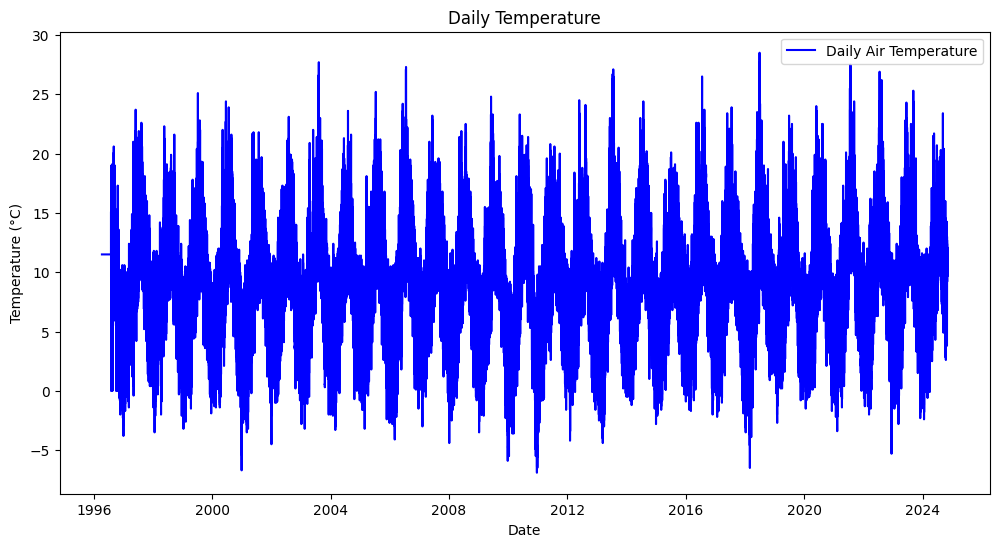

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['temp'], label='Daily Air Temperature', color='blue')
plt.title('Daily Temperature')
plt.xlabel('Date, Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


Calculate and plot the mean Temperature each day

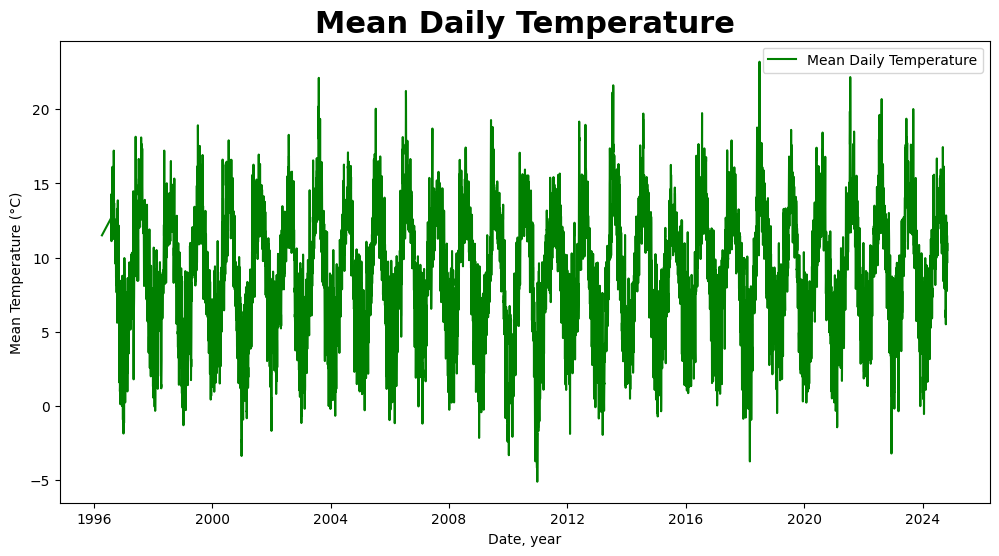

In [27]:
mean_daily_temp = df.groupby(df['date'].dt.date)['temp'].mean()
plt.figure(figsize=(12, 6))
plt.plot(mean_daily_temp.index, mean_daily_temp.values, label='Mean Daily Temperature', color='green')
plt.title('Mean Daily Temperature', fontweight='bold', fontsize=22)
plt.xlabel('Date, year')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()

Calculate and plot the mean temperature each month

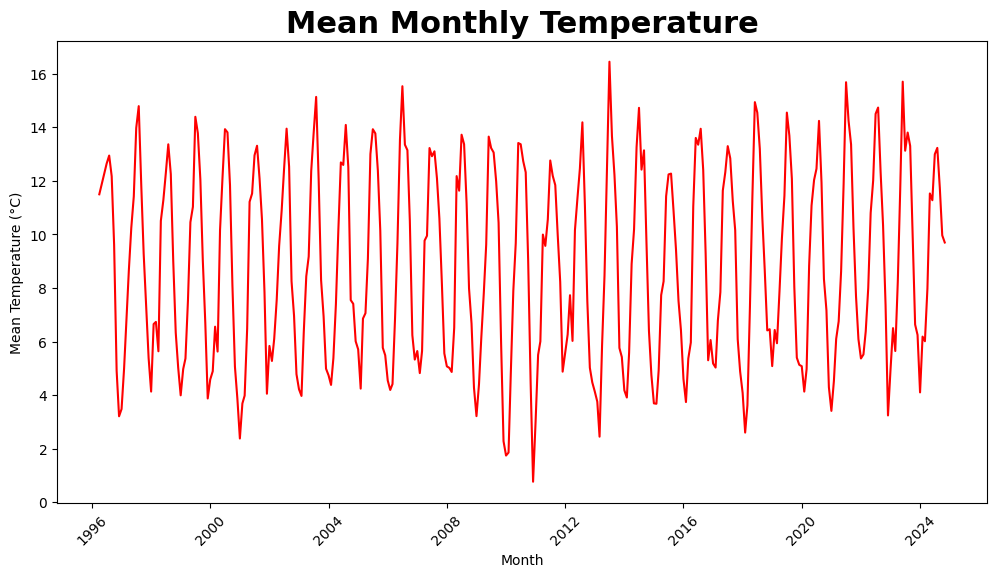

In [34]:
df['Month'] = df['date'].dt.to_period('M')
mean_monthly_temp = df.groupby('Month')['temp'].mean()
mean_monthly_temp.index = mean_monthly_temp.index.to_timestamp()
plt.figure(figsize=(12, 6))
plt.plot(mean_monthly_temp.index, mean_monthly_temp.values, label='Mean Monthly Temperature', color='red')
plt.title('Mean Monthly Temperature', fontweight='bold',fontsize=22)
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

## References
https://www.kdnuggets.com/7-essential-data-quality-checks-with-pandas

https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
